### 阅读说明
以下为OpenAI主要以GPT调用为例的api介绍，主要包含三部分：

入门流程 --调用api的全过程介绍

账户API获得途径 --获得api-key的两种路径介绍

实用函数 --如何返回结果？如何调用前计算token？如何高效编写promopt？



## 一、入门流程

本模块内容主要参见：\[OpenAI API Authentication](https://platform.openai.com/docs/api-reference/authentication)

### （1）下载组件

```bash
pip install openai
```

### （2）获得 API KEYS

参见：[API keys - OpenAI API](https://platform.openai.com/docs/api-reference/authentication)

- 中间的 KEY 即为调用时填写的 api-key 值
- 左侧导航栏 RateLimits 可以查看账户使用各模型的权限及使用限制
- Usage 查看花费
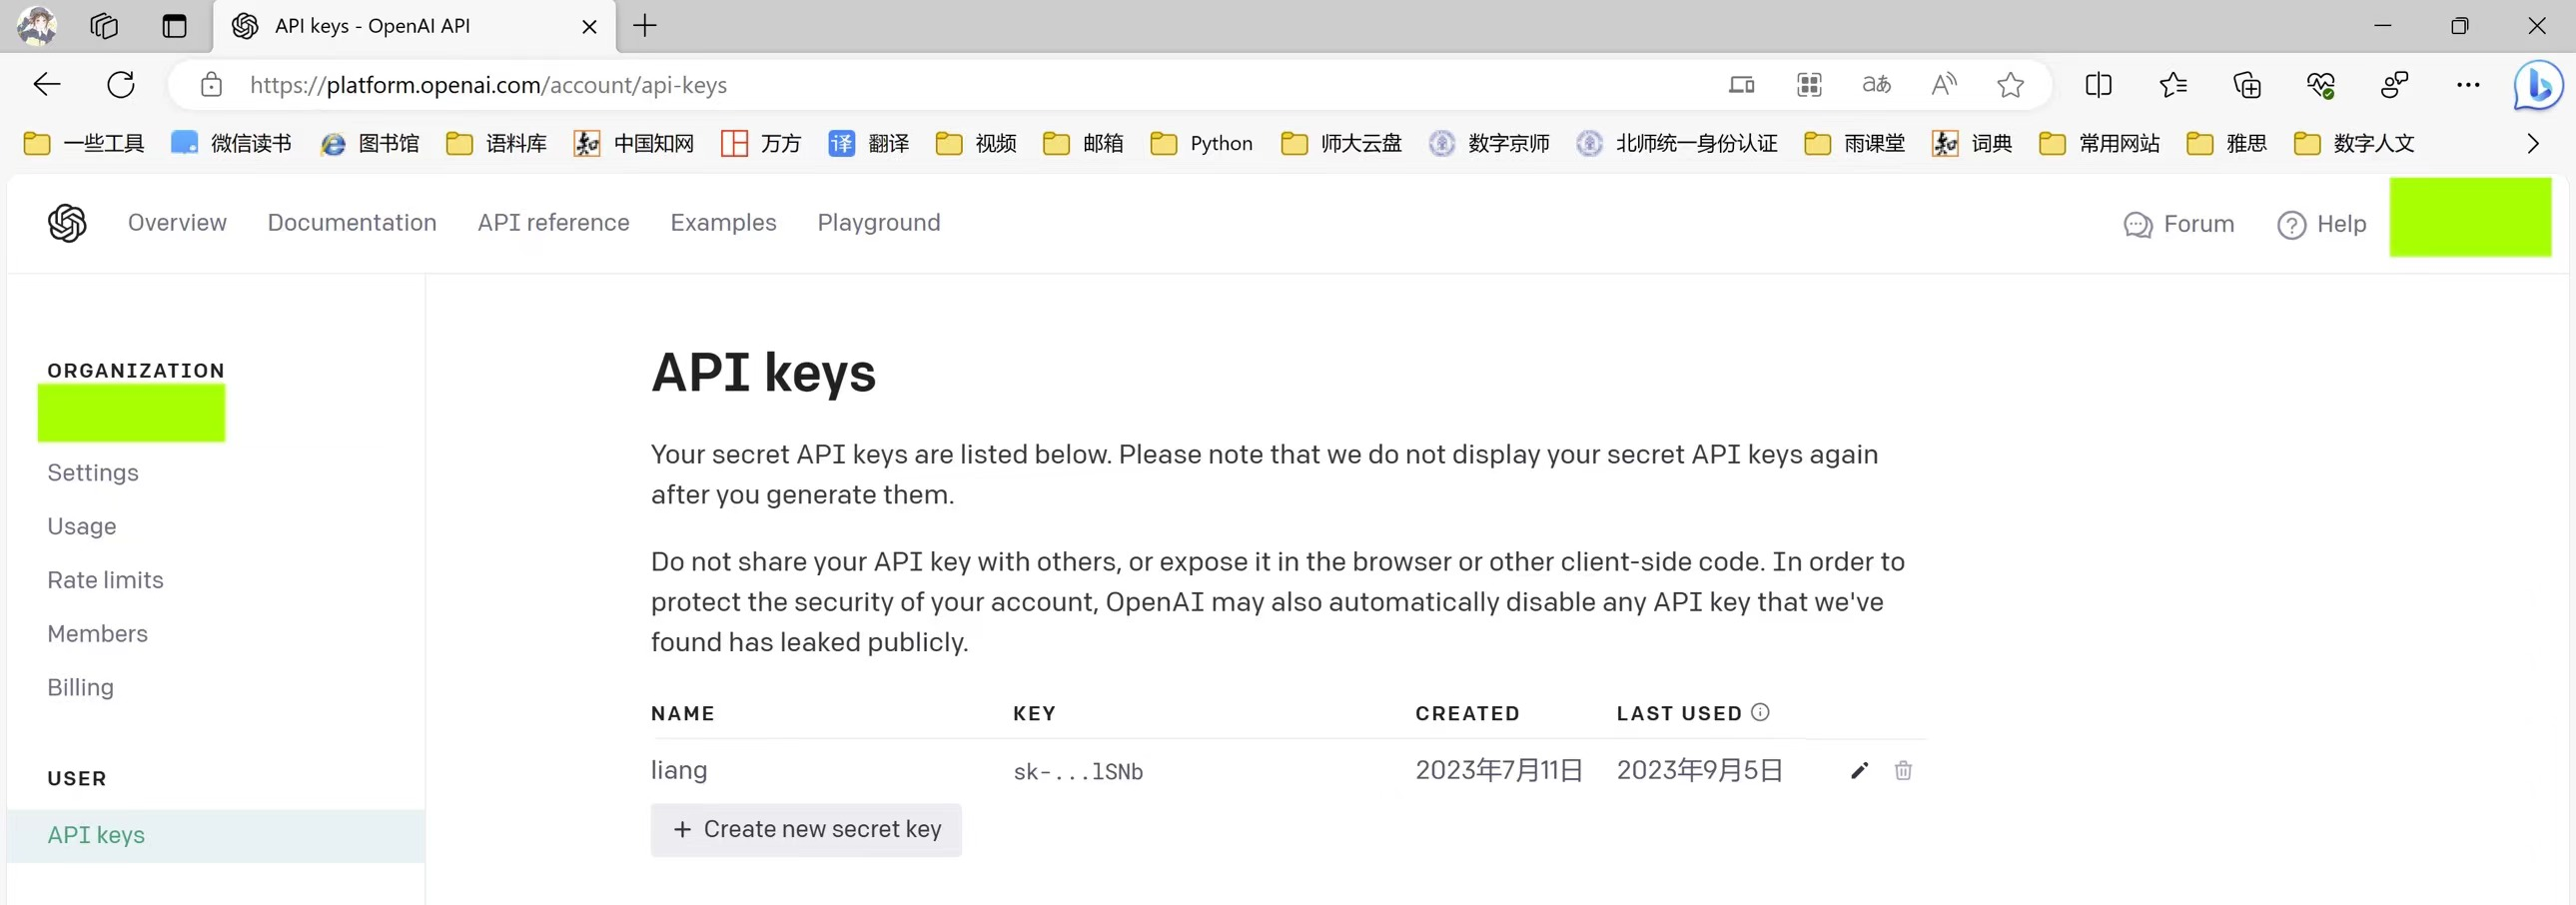

### （3）Python 使用（以 chat-completion 为例）

参见：[OpenAI API Examples](https://platform.openai.com/examples)

```python
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Hello!"}
  ]
)
print(completion.choices[0].message)
```


## 二、账户 API 权限获得路径

### （1）路径一：官方账号

- 最推荐、最安全、最隐私，不存在数据泄露，不需要支付额外费用
- 需要绑定国外信用卡
  - 可考虑注册虚拟卡  
    recommended by 世图，参见：[https://www.vvacard.com/](https://www.vvacard.com/)

### （2）路径二：第三方代理（谨慎！不推荐！）

- 便捷，多数支持依据 token 数单次购买
- 有受骗跑路风险；有隐私及数据的泄露风险；部分溢价或需要支付代理费（请参照 openai 官方价格）  
  recommended by 钰君，参见：[GPT_API_free on GitHub](https://github.com/chatanywhere/GPT_API_free)

## 三、实用函数

### （1）chat-completion 返回

```python
import openai
from dotenv import load_dotenv, find_dotenv

def get_completion(prompt, model="gpt-4"):
    messages = [{"role":'system','content':'You are ChatGPT, a large language model trained by OpenAI. Knowledge cutoff: 2021-09 Current date: 2023/9/7'},{"role": "user", "content": prompt}]
    # content处内容为官方设定，据说能提高准确率
    # 此处role可根据任务需要选择system,user,assistant
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    # 此处temperature可根据任务需要在区间[0,1]调整，一般而言，趋近于1则返回更有“创造性”，趋近于0则返回更“精确性”
    )
    return response.choices[0].message["content"]
```

### （2）prompt 的 token 计算

为什么要计算 token？

- 对自己的花费心里有个底，适用于大规模处理数据前的整体成本（时间&金钱）预估
- 不超出不同模型使用的窗口长度限制，否则报错

```python
import tiktoken

def num_tokens_from_string(string: str) -> int:
    encoding_name = 'cl100k_base'
    #  此处我直接指定了适用于GPT的编码方式，调用OPENAI的不同模型的编码方式可能不一样，参见：https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens
```

### （3）Prompt 编写

- [OpenAI 关于 Prompt 的一个简短说明 & 同样适用于交互网页](https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-openai-api)
- [OpenAI GitHub 图文教程](https://github.com/openai/openai-cookbook/blob/main/techniques_to_improve_reliability.md)
- [OpenAI & 吴恩达 视频讲解](https://www.bilibili.com/video/BV1Mo4y157iF/?spm_id_from=333.337.search-card.all.click&vd_source=0fa678dd0b4cf0b24e13cec296c99a1d)

### （4）检索能力增强   
recommended by 兆基
- [LlamaIndex](https://www.llamaindex.ai/)
- [LangChain](https://python.langchain.com/docs/get_started/installation)
